# Se genera formato de red para luego meter a gephi, se sugiere todo hacerlo desde networkx
Se busca generar comunidades o metricas de comparacion entre un cambio y otro de las proteinas observando su red, cambio de comunidad, analisis de red promedio.

Para este expermiento se utilizaron los archivos trj_0.pdb y trj_0_A.pdb que corresponden a proteinas pd1 con dos simulaciones iguales de distinta conformacion (puntos de entrada distintos).

Con los enlaces generados por medio del script get_md_hb_net.py se generan los enlaces y con ello se comienza el analisis de la red.

Se cuentan el numero de enlaces que se repiten en las 400 simulaciones por lo que obtendriamos una red promedio si ponderamos por el numero de simulaciones, se generan de los dos archivos y se compara.

In [545]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('max_rows', 200)
pd.set_option('max_columns', 250)

import networkx as nx,community
import matplotlib.pyplot as plt
plt.style.use('ggplot')
font = {'family' : 'sans',
        'weight' : 'bold',
        'size'   : 20}
plt.rc('font', **font)

plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams[u'figure.figsize'] = (16,8)

In [546]:
red = pd.read_csv("hh_trj_0.txt", sep='_',names=['from',"to"])

In [547]:
datos = pd.read_csv("hh_trj_0.txt",names=['edges'],sep=' ').reset_index()
frecuencia_edges = datos.edges.value_counts()

In [548]:
values = datos.edges.str[:3].str.replace("_","").values.tolist()
it = 0
value_list = []
for i,val in enumerate(values):
#     print(values[i-1],values[i],it)
    if (int(values[i-1]) <= int(values[i])) :
        value_list.append(it)
    else:
        it = it + 1
        value_list.append(it)
    

In [549]:
datos.head()

,index,edges
0,1,36_55
1,1,38_53
2,1,40_141
3,1,42_143
4,1,44_145


In [550]:
datos['iteracion'] = value_list

In [551]:
frec = datos.edges.value_counts()
frec = frec.reset_index()
frec.columns = ['edges','frequency']

In [552]:
red_buena = datos.merge(frec,on='edges').sort_values('iteracion').reset_index(drop=True)

In [553]:
a = red_buena.edges.str.split("_").str.get(0)
b = red_buena.edges.str.split("_").str.get(1)

In [554]:
red_buena['Source'] = a
red_buena['Target'] = b

In [555]:
red_buena.drop('edges',1,inplace=True)

In [556]:
#red_buena.to_csv('red_dinamica_prueba.csv',index=False)

# Redes Promedio

In [557]:
red_1 = pd.read_csv("hh_trj_0.txt",names=['edges']).edges.str.split(" ").str.get(1).reset_index()
frec_1 = red_1.edges.value_counts()
frec_1 = frec_1.reset_index()
frec_1.columns = ['edges','frequency']

a = frec_1.edges.str.split("_").str.get(0)
b = frec_1.edges.str.split("_").str.get(1)
frec_1['Source'] = a
frec_1['Target'] = b

#frec_1.drop('edges',1,inplace=True)

In [558]:
red_2 = pd.read_csv("hh_trj_0_A.txt",names=['edges']).edges.str.split(" ").str.get(1).reset_index()
frec_2 = red_2.edges.value_counts()
frec_2 = frec_2.reset_index()
frec_2.columns = ['edges','frequency']

a = frec_2.edges.str.split("_").str.get(0)
b = frec_2.edges.str.split("_").str.get(1)
frec_2['Source'] = a
frec_2['Target'] = b

#frec_2.drop('edges',1,inplace=True)

In [597]:
A = nx.from_pandas_edgelist(frec_1,source='Source',target='Target',
                            edge_attr='frequency',create_using=nx.DiGraph())
B = nx.from_pandas_edgelist(frec_2,source='Source',target='Target',
                            edge_attr='frequency',create_using=nx.DiGraph())

part_a = community.best_partition(A)#,weight='frequency')
part_b = community.best_partition(B)#,weight='frequency')

# nx.set_node_attributes(A, part_a, 'community')
# nx.set_node_attributes(B, part_b, 'community')

TypeError: Bad graph type, use only non directed graph

In [565]:
nx.write_gexf(A,"red_nueva.gexf")

nx.write_gexf(B,"red_nueva_A.gexf")

Ya se escribio la red en formato gexf para su visualizacion en gephi

# Analisis de frecuencia para encontrar el amino rarito
Con el fin de dar con un aminoacido se analiza la diferencia de la frecuencia del enlace identificando aquellos enlaces que ocurren muchas veces en un caso y en otro no. que sea significado mas de la mitad de las veces. o el 75% de las veces

In [520]:
red_a_comparar = frec_1[['edges','frequency']].merge(
    frec_2[['edges','frequency']],on='edges',how='left')
red_a_comparar.fillna(0,inplace=True)

In [521]:
red_a_comparar['frec_diff'] = red_a_comparar.frequency_x - red_a_comparar.frequency_y

(-222.44, 178.3599999999999)

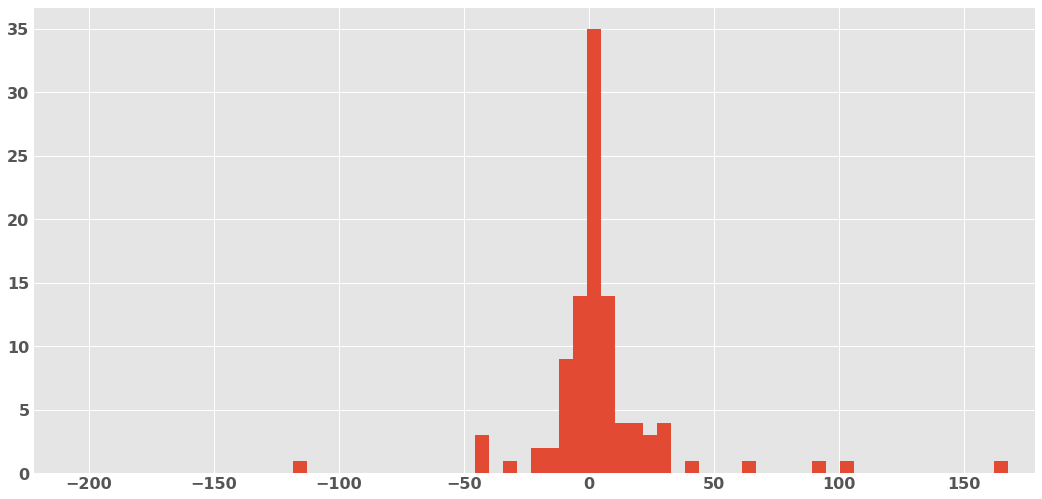

In [522]:
red_a_comparar.frec_diff.hist(bins=100)
plt.xlim(red_a_comparar.frec_diff.quantile(0.01),red_a_comparar.frec_diff.quantile(0.99))

In [523]:
red_a_comparar.sort_values('frec_diff')

,edges,frequency_x,frequency_y,frec_diff
102,127_133,1,344.00000,-343.00000
55,133_127,143,370.00000,-227.00000
49,65_82,237,350.00000,-113.00000
37,62_128,344,389.00000,-45.00000
44,110_50,321,364.00000,-43.00000
42,94_111,330,371.00000,-41.00000
88,93_95,3,34.00000,-31.00000
35,104_56,359,377.00000,-18.00000
73,91_93,9,27.00000,-18.00000
51,115_118,208,223.00000,-15.00000


# Conteo de comunidades
Aca lo que generamos son las comunidades y como varian los nodos de comunidad entre una archivo y otro

In [537]:
com_a, com_b = pd.Series(part_a),pd.Series(part_b)

In [539]:
comunidades = pd.concat([com_a,com_b],1)
comunidades.columns = ['red','red_a']

In [540]:
comunidades.sort_values('red',ascending=True)

,red,red_a
0,"{121, 140}","{142, 119}"
20,"{129, 132, 127, 130, 133, 131}","{111, 94}"
19,"{111, 65, 91, 90, 97, 95, 78, 89, 85, 82, 87, ...","{120, 70}"
18,"{71, 72, 73, 74, 75}","{56, 105, 104, 100, 103, 102, 58}"
17,"{56, 128, 60, 105, 104, 100, 63, 103, 62, 61, ...","{109, 96}"
16,"{123, 137}","{36, 55}"
15,"{120, 70}","{107, 98}"
14,"{109, 96}","{44, 143, 42, 146, 141, 40, 46, 145}"
13,"{114, 115, 117, 118}","{114, 118, 115, 116, 117}"
12,"{36, 55}","{128, 129, 63, 86, 84, 83, 62, 61}"


In [ ]:
comunidades[comunidades.red == 16]

In [124]:
comunidades[comunidades.red == 26]

,red,red_a
127,26.00000,22.00000
129,26.00000,13.00000
130,26.00000,nan
131,26.00000,nan
132,26.00000,nan
133,26.00000,22.00000


In [120]:
comunidades[comunidades.index.isin(['127','133'])]

,red,red_a
127,26.00000,22.00000
133,26.00000,22.00000


In [543]:
comun = pd.DataFrame(comunidades.reset_index().groupby('red').index.unique())

comun_a = pd.DataFrame(comunidades.reset_index().groupby('red_a').index.unique())

comparacion_de_comunidades = pd.concat([comun,comun_a],1)
comparacion_de_comunidades.columns = ['comunidad','comunidad_a']
comparacion_de_comunidades.fillna(0,inplace=True)
comparacion_de_comunidades

ValueError: 

## Observacion de comunidades diferentes entre cada archivo
Una ves que obtenemos las comunidades de cada archivo quitamos las que siempre se generan y observamos las comunidades distintas para observar cambios drasticos dado el cambio en el archivo_A

In [362]:
#Se filtran con un doble for, quite la ultima columna dado que no tiene nodos
lista_filtro = []
lista_filtro_a = []
for i in range(comparacion_de_comunidades.shape[0]-1):
    for j in range(comparacion_de_comunidades.shape[0]):
        if set(
            comparacion_de_comunidades.comunidad.values[i]) == set(
            comparacion_de_comunidades.comunidad_a.values[j]):
            lista_filtro.append(comparacion_de_comunidades.comunidad.values[i])
            lista_filtro_a.append(comparacion_de_comunidades.comunidad_a.values[j])

#lista_filtro,lista_filtro_a

In [363]:
lista_filtrada = pd.DataFrame(
    comparacion_de_comunidades[comparacion_de_comunidades.comunidad.isin(
        lista_filtro)==False].comunidad)
lista_filtrada['tipo'] = 'filtrada'
lista_filtrada_a = pd.DataFrame(
    comparacion_de_comunidades[comparacion_de_comunidades.comunidad_a.isin(
        lista_filtro_a)==False].comunidad)
lista_filtrada_a['tipo'] = 'filtrada_a'

Aqui se pueden comparar las comunidades

In [364]:
lista_filtrada

,comunidad,tipo
15.00000,"[114, 117]",filtrada
16.00000,"[67, 78, 79, 80, 81, 89, 90, 91, 92, 93, 95, 97]",filtrada
20.00000,"[104, 56, 58]",filtrada
21.00000,"[100, 101, 102, 103, 105]",filtrada
22.00000,"[128, 60, 62]",filtrada
25.00000,"[65, 82, 84, 85, 86, 87, 88]",filtrada
26.00000,"[127, 129, 130, 131, 132, 133]",filtrada
28.00000,"[61, 63]",filtrada
31.00000,0,filtrada


In [365]:
lista_filtrada_a

,comunidad,tipo
10.00000,"[126, 64]",filtrada_a
13.00000,"[36, 55]",filtrada_a
14.00000,"[141, 143, 145, 146, 40, 42, 44, 46]",filtrada_a
19.00000,"[123, 137]",filtrada_a
22.00000,"[128, 60, 62]",filtrada_a
23.00000,"[71, 72, 73, 74, 75]",filtrada_a
24.00000,"[111, 94]",filtrada_a
27.00000,"[115, 118]",filtrada_a
29.00000,"[138, 35]",filtrada_a


# Ahora se busca una metrica de robustez de la comunidad para observar si es relevante o no esa comunidad

In [516]:
nx.algorithms.community.quality.modularity(A,next(community.girvan_newman(A)))

0.8683900226757257

In [514]:
from networkx.algorithms import community
particiones = next(community.girvan_newman(A))

In [493]:
densidad_x_comunidad = []
for i in particiones:
    subgrafo = A.subgraph(i)
    print(i,sum(dict(subgrafo.degree(weight='frequency')).values())/len(subgrafo))

{'121', '140'} 788.0
{'67', '69', '80', '77', '79'} 688.4
{'142', '119'} 709.0
{'106', '54'} 772.0
{'125', '135'} 785.0
{'122', '68'} 762.0
{'50', '113', '110', '44', '48', '40', '143', '42', '146', '47', '141', '45', '46', '145'} 566.7142857142857
{'38', '53'} 754.0
{'108', '52'} 780.0
{'126', '64'} 783.0
{'124', '66'} 781.0
{'107', '98'} 716.0
{'36', '55'} 754.0
{'114', '115', '117', '118'} 299.0
{'109', '96'} 756.0
{'120', '70'} 387.0
{'123', '137'} 367.0
{'56', '128', '60', '105', '104', '100', '63', '103', '62', '61', '102', '58', '101'} 247.07692307692307
{'71', '72', '73', '74', '75'} 258.8
{'111', '65', '91', '90', '97', '95', '78', '89', '85', '82', '87', '88', '86', '94', '84', '92', '81', '93'} 117.22222222222223
{'129', '132', '127', '130', '133', '131'} 159.0
{'35', '138'} 4.0
{'59', '31'} 2.0
